# 0. IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. LOAD DATA

In [3]:
try:
    df_gym_members = pd.read_csv(r'C:\Users\ACER\Desktop\gymml\dat2\gym_members_exercise_tracking.csv')
    df_megagym = pd.read_csv(r'C:\Users\ACER\Desktop\gymml\dat\megaGymDataset.csv')
    df_summary = pd.read_csv(r'C:\Users\ACER\Desktop\gymml\archive (3)\program_summary.csv')
    df_detailed = pd.read_csv(r'C:\Users\ACER\Desktop\gymml\archive (3)\programs_detailed_boostcamp_kaggle.csv')
    df_meals = pd.read_csv(r'C:\Users\ACER\Desktop\gymml\food\epi_r.csv')
    print("DONE")
except FileNotFoundError as e:
    print(f"ERROR {e}")



DONE


# DATA EXPLORE

In [4]:
print("Gym Members Data Info:")
df_gym_members.info()
df_gym_members.head()

Gym Members Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/wee

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
print("Mega Gym Data Info:")
df_megagym.info()
df_megagym.head()

Mega Gym Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [6]:
print("Gym Summary Data Info:")
df_summary.info()
df_summary.head()

Gym Summary Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2598 non-null   object 
 1   description       2594 non-null   object 
 2   level             2598 non-null   object 
 3   goal              2598 non-null   object 
 4   equipment         2597 non-null   object 
 5   program_length    2597 non-null   float64
 6   time_per_workout  2598 non-null   float64
 7   total_exercises   2598 non-null   int64  
 8   created           2597 non-null   object 
 9   last_edit         2596 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 203.1+ KB


,title,description,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,(MASS MONSTER) High Intensity 4 Day Upper Lowe...,Build tones of muscular with this high intensi...,['Intermediate'],"['Muscle & Sculpting', 'Bodyweight Fitness']",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,(NOT MY PROGRAM)SHJ Jotaro,Build strength and size,"['Advanced', 'Intermediate']",['Bodybuilding'],Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00
2,1 PowerLift Per Day Powerbuilding 5 Day Bro Split,Based off of Andy Baker's KCS (Kingwood Streng...,"['Beginner', 'Novice', 'Intermediate']","['Athletics', 'Powerlifting', 'Powerbuilding']",Full Gym,6.0,90.0,237,2025-04-23 09:21:00,2025-06-18 11:55:00
3,10 Week Mass Building Program,This workout is designed to increase your musc...,"['Intermediate', 'Advanced']",['Powerbuilding'],Garage Gym,10.0,70.0,280,2024-09-07 03:44:00,2025-06-18 08:01:00
4,10 week deadlift focus,Increase deadlift,"['Intermediate', 'Advanced']","['Powerbuilding', 'Powerlifting', 'Bodybuildin...",Full Gym,10.0,80.0,356,2024-12-23 03:13:00,2025-06-18 12:19:00


In [7]:
print("Gym Detailed Data Info:")
df_detailed.info()
df_detailed.head()

Gym Detailed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605033 entries, 0 to 605032
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   title                605033 non-null  object 
 1   description          604214 non-null  object 
 2   level                605033 non-null  object 
 3   goal                 605033 non-null  object 
 4   equipment            605017 non-null  object 
 5   program_length       605017 non-null  float64
 6   time_per_workout     605033 non-null  float64
 7   week                 605033 non-null  float64
 8   day                  605033 non-null  float64
 9   number_of_exercises  605033 non-null  float64
 10  exercise_name        605033 non-null  object 
 11  sets                 605033 non-null  float64
 12  reps                 605033 non-null  float64
 13  intensity            605033 non-null  float64
 14  created              605017 non-null  object

,title,description,level,goal,equipment,program_length,time_per_workout,week,day,number_of_exercises,exercise_name,sets,reps,intensity,created,last_edit
0,Weightlifting Mobility program,This program is designed to help athletes succ...,"['Beginner', 'Novice', 'Intermediate', 'Advanc...","['Olympic Weightlifting', 'Muscle & Sculpting'...",Garage Gym,7.0,50.0,1.0,1.0,16.0,Knee-to-wall ankle dorsiflexion test,3.0,-180.0,6.0,2025-03-09 04:11:00,2025-06-23 03:31:00
1,Weightlifting Mobility program,This program is designed to help athletes succ...,"['Beginner', 'Novice', 'Intermediate', 'Advanc...","['Olympic Weightlifting', 'Muscle & Sculpting'...",Garage Gym,7.0,50.0,1.0,1.0,16.0,Banded ankle distractions,3.0,-18.0,6.0,2025-03-09 04:11:00,2025-06-23 03:31:00
2,Weightlifting Mobility program,This program is designed to help athletes succ...,"['Beginner', 'Novice', 'Intermediate', 'Advanc...","['Olympic Weightlifting', 'Muscle & Sculpting'...",Garage Gym,7.0,50.0,1.0,1.0,16.0,Slant board calf stretch,3.0,-18.0,6.0,2025-03-09 04:11:00,2025-06-23 03:31:00
3,Weightlifting Mobility program,This program is designed to help athletes succ...,"['Beginner', 'Novice', 'Intermediate', 'Advanc...","['Olympic Weightlifting', 'Muscle & Sculpting'...",Garage Gym,7.0,50.0,1.0,1.0,16.0,Seated Tibialis Raise,3.0,15.0,6.0,2025-03-09 04:11:00,2025-06-23 03:31:00
4,Weightlifting Mobility program,This program is designed to help athletes succ...,"['Beginner', 'Novice', 'Intermediate', 'Advanc...","['Olympic Weightlifting', 'Muscle & Sculpting'...",Garage Gym,7.0,50.0,1.0,1.0,16.0,90/90 Hip Rotations,3.0,8.0,6.0,2025-03-09 04:11:00,2025-06-23 03:31:00


In [8]:
print("Meals Data Info:")
df_meals.info()
df_meals.head()

Meals Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA CLEANING

# 2. GYM MEMBERS DATA CLEANING

In [ ]:
# Gym Members Data : Fat_Percentage
# BMI=weight(kg)/height(m)^2


#remove the missing values 
df_gym_members.dropna(subset=['Fat_Percentage', 'BMI'], inplace=True)
print(f"Gym Members Data size after dropping NaNs: {df_gym_members.shape}")

#remove () and spaces (Clean columns) 
df_gym_members.columns = (df_gym_members.columns
                          .str.replace(r' \(.*\)', '', regex=True)
                          .str.replace('_', ' ', regex=False)
                          .str.strip().str.lower()
                          .str.replace(' ', '_', regex=False))
print("\nGym Members Data (Cleaned Columns Head):")
print(df_gym_members.head())


df_gym_members = pd.get_dummies(df_gym_members, columns=['gender', 'workout_type'], drop_first=True)
print("\nGym Members Data (After Encoding Info):")
df_gym_members.info()





Gym Members Data size after dropping NaNs: (973, 15)

Gym Members Data (Cleaned Columns Head):
   age  gender  weight  height  max_bpm  avg_bpm  resting_bpm  \
0   56    Male    88.3    1.71      180      157           60   
1   46  Female    74.9    1.53      179      151           66   
2   32  Female    68.1    1.66      167      122           54   
3   25    Male    53.2    1.70      190      164           56   
4   38    Male    46.1    1.79      188      158           68   

   session_duration  calories_burned workout_type  fat_percentage  \
0              1.69           1313.0         Yoga            12.6   
1              1.30            883.0         HIIT            33.9   
2              1.11            677.0       Cardio            33.4   
3              0.59            532.0     Strength            28.8   
4              0.64            556.0     Strength            29.2   

   water_intake  workout_frequency  experience_level    bmi  
0           3.5                  4   

# Correlation heatmap

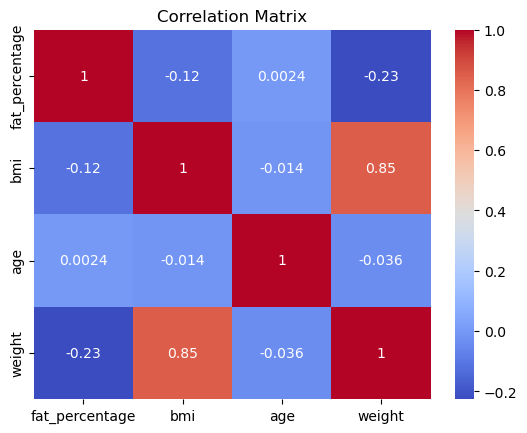

In [10]:
corr=df_gym_members[['fat_percentage', 'bmi', 'age', 'weight']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 3. MEGA GYM DATA CLEANING

In [11]:
#Mega Gym Data types: exercise_name, type, body_part, equipment, level


# remove unnecessary columns
df_megagym.drop(columns=['Unnamed: 0', 'Desc', 'Rating', 'RatingDesc'], inplace=True)

# rename columns for easier handling
df_megagym.columns = ['exercise_name', 'type', 'body_part', 'equipment', 'level']

# nan values
df_megagym['equipment'].fillna('None', inplace=True)

# clean from spaces and missing values
for col in ['type', 'body_part', 'equipment', 'level']:
    df_megagym[col] = df_megagym[col].astype(str).str.strip()

print("\nMega Gym Data (Cleaned Head):")
print(df_megagym.head())
print("\nMega Gym Data (Cleaned Info):")
df_megagym.info()



Mega Gym Data (Cleaned Head):
                  exercise_name      type   body_part equipment         level
0        Partner plank band row  Strength  Abdominals     Bands  Intermediate
1  Banded crunch isometric hold  Strength  Abdominals     Bands  Intermediate
2         FYR Banded Plank Jack  Strength  Abdominals     Bands  Intermediate
3                 Banded crunch  Strength  Abdominals     Bands  Intermediate
4                        Crunch  Strength  Abdominals     Bands  Intermediate

Mega Gym Data (Cleaned Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   exercise_name  2918 non-null   object
 1   type           2918 non-null   object
 2   body_part      2918 non-null   object
 3   equipment      2918 non-null   object
 4   level          2918 non-null   object
dtypes: object(5)
memory usage: 114.1+ KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_14684\2848958562.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_megagym['equipment'].fillna('None', inplace=True)


# 4. DETAILED PROGRAMS AGGREGATION

In [ ]:
# claculate the average per program

df_detailed_agg = df_detailed.groupby(['title', 'goal', 'level']).agg(
    avg_exercises_per_program=('number_of_exercises', 'mean'),
    avg_intensity_per_program=('intensity', 'mean'),
    program_length_weeks=('program_length', 'max')
).reset_index()
print(df_detailed_agg.head())

# rename columns for easier handling 
#from groupby 
df_detailed_agg.columns = [
    'workout_title',      # title 
    'program_goal',       # goal
    'program_level',      # level
    'avg_exercises',      # avg_exercises_per_program
    'avg_intensity',      # avg_intensity_per_program
    'program_length'      # program_length_weeks
]
print("\nDetailed Aggregated Data (Renamed Columns Head):")
print(df_detailed_agg.head())


# {'Lose Weight': 0.65, 'Build Muscle': 0.72,}
# we map it in a dictionary
print("\nCalculated Intensity Map:")


print("DONE CLEANING AND PREPARING DATA")

                                               title  \
0  (MASS MONSTER) High Intensity 4 Day Upper Lowe...   
1                         (NOT MY PROGRAM)SHJ Jotaro   
2                         (NOT MY PROGRAM)SHJ Jotaro   
3  1 PowerLift Per Day Powerbuilding 5 Day Bro Split   
4  1 PowerLift Per Day Powerbuilding 5 Day Bro Split   

                                             goal  \
0    ['Muscle & Sculpting', 'Bodyweight Fitness']   
1          ['Bodybuilding', 'Muscle & Sculpting']   
2                                ['Bodybuilding']   
3  ['Athletics', 'Powerlifting', 'Powerbuilding']   
4          ['Bodybuilding', 'Muscle & Sculpting']   

                                               level  \
0                                   ['Intermediate']   
1                                   ['Intermediate']   
2                       ['Advanced', 'Intermediate']   
3             ['Beginner', 'Novice', 'Intermediate']   
4  ['Beginner', 'Novice', 'Intermediate', 'Advanc...   

   avg_

# Intensity Mapping

In [13]:
# Intensity Mapping (for cold-start recommendation)

intensity_mapping = df_detailed_agg.groupby('program_goal')['avg_intensity'].mean().to_dict()
print("Intensity Map:", intensity_mapping)

Intensity Map: {"['At-Home & Calisthenics', 'Muscle & Sculpting', 'Bodyweight Fitness']": 8.716666666666667, "['Athletics', 'Bodybuilding', 'Bodyweight Fitness']": 7.968242128242128, "['Athletics', 'Bodybuilding', 'Muscle & Sculpting', 'Bodyweight Fitness', 'Powerbuilding', 'Powerlifting']": 8.347433841218924, "['Athletics', 'Bodybuilding', 'Muscle & Sculpting', 'Bodyweight Fitness', 'Powerbuilding']": 6.871632622508176, "['Athletics', 'Bodybuilding', 'Muscle & Sculpting', 'Bodyweight Fitness']": 7.451322156951822, "['Athletics', 'Bodybuilding', 'Muscle & Sculpting', 'Powerbuilding']": 8.33030303030303, "['Athletics', 'Bodybuilding', 'Muscle & Sculpting']": 7.876861109442136, "['Athletics', 'Bodybuilding', 'Olympic Weightlifting', 'Powerbuilding']": 7.872924901185771, "['Athletics', 'Bodybuilding', 'Olympic Weightlifting', 'Powerlifting']": 8.258333333333333, "['Athletics', 'Bodybuilding', 'Powerbuilding', 'Bodyweight Fitness', 'Muscle & Sculpting']": 8.263286713286714, "['Athletics', 

# ML PHASE 1 FOR FAT

# 5. FAT PERCENTAGE REGRESSION

In [ ]:
y = df_gym_members['fat_percentage']
X = df_gym_members.drop('fat_percentage', axis=1)

# (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data (X_train): {X_train.shape}")
print(f"Testing Data (X_test): {X_test.shape}")

Training Data (X_train): (778, 16)
Testing Data (X_test): (195, 16)


In [ ]:
# we will test 3 models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}


for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # evaluation:

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # R^2
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'R2_Score': r2}

print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"- {name}: RMSE = {metrics['RMSE']:.2f}, R2 Score = {metrics['R2_Score']:.2f}")


best_model_name = max(results, key=lambda k: results[k]['R2_Score'])
best_model = models[best_model_name]
joblib.dump(best_model, 'fat_percentage_predictor.joblib')
print(f"\nTHE WINNER IS : {best_model_name}")



Model Evaluation Results:
- Linear Regression: RMSE = 3.87, R2 Score = 0.62
- Decision Tree Regressor: RMSE = 4.00, R2 Score = 0.60
- Random Forest Regressor: RMSE = 2.81, R2 Score = 0.80

THE WINNER IS : Random Forest Regressor


In [ ]:
# Baseline model used for reference comparison only

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error


baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

y_pred_baseline = baseline.predict(X_test)

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
print(f"\nBaseline Model RMSE: {rmse_baseline:.2f}")
print(f"\nBaseline Model MSE: {mse_baseline:.2f}")



Baseline Model RMSE: 6.30

Baseline Model MSE: 39.71


# Best model

In [ ]:
best_model_name = max(results, key=lambda k: results[k]['R2_Score'])
best_model = models[best_model_name]
joblib.dump(best_model, 'fat_percentage_predictor.joblib')
print(f"\nTHE WINNER IS : {best_model_name}")


THE WINNER IS : Random Forest Regressor


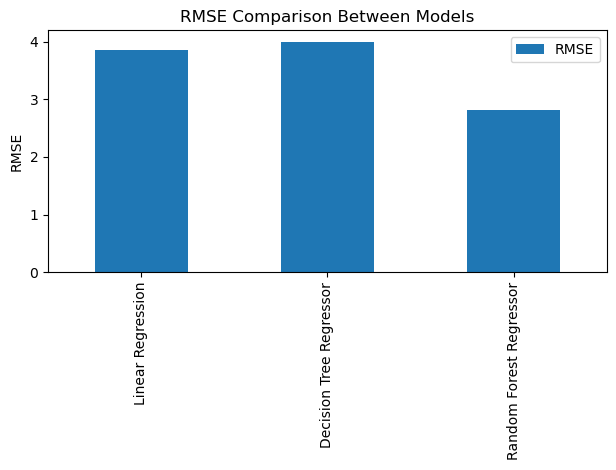

In [ ]:
results_df=pd.DataFrame(results).T

results_df[['RMSE']].plot(kind='bar', title='RMSE Comparison Between Models')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


 Top 5 Important Features for Fat Percentage Prediction:
session_duration    0.423522
experience_level    0.241145
gender_Male         0.142543
weight              0.027286
water_intake        0.024167
dtype: float64


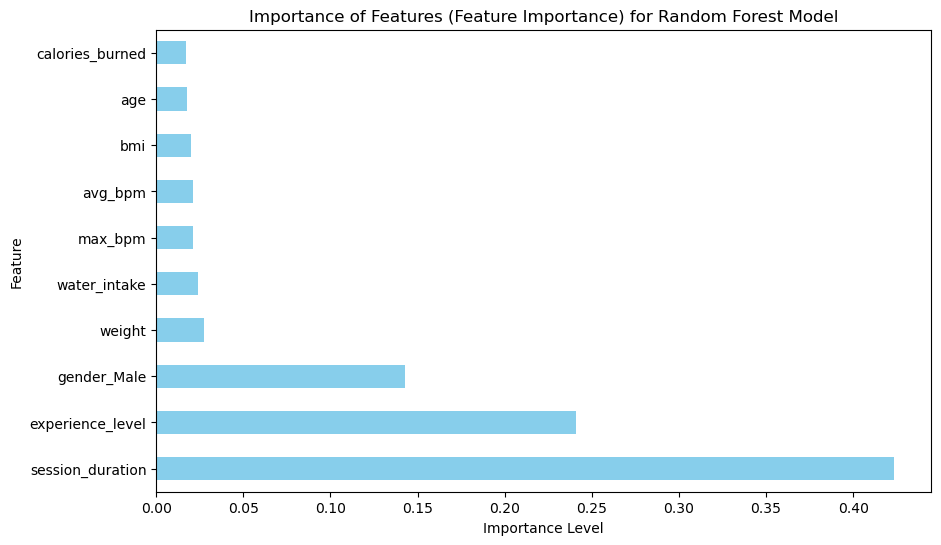

In [ ]:
# feature extraction
importances = best_model.feature_importances_

#(X_train.columns) importances with column names
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)


sorted_importances = feature_importances.sort_values(ascending=False)


print("\n Top 5 Important Features for Fat Percentage Prediction:")
print(sorted_importances.head(5))


plt.figure(figsize=(10, 6))
sorted_importances.head(10).plot(kind='barh', color='skyblue')
plt.title('Importance of Features (Feature Importance) for Random Forest Model')
plt.xlabel('Importance Level')
plt.ylabel('Feature')
plt.show()

# Actual vs Predicted

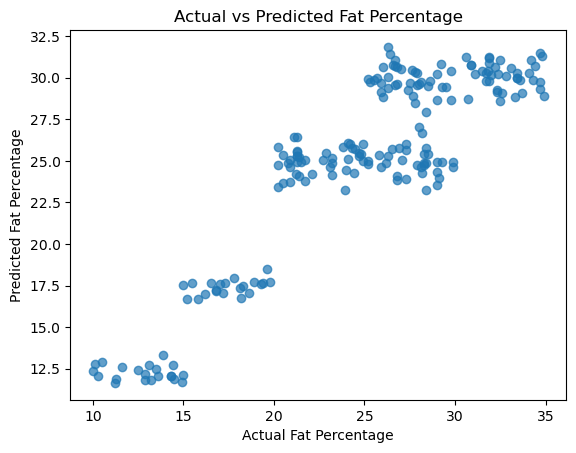

In [ ]:
plt.scatter(y_test, best_model.predict(X_test), alpha=0.7)
plt.title('Actual vs Predicted Fat Percentage')
plt.xlabel('Actual Fat Percentage')
plt.ylabel('Predicted Fat Percentage')
plt.show()

#  ML PHASE 2 FOR workouts

# Recommendation Systems

# 6. EXERCISE RECOMMENDATION (TF-IDF)


In [ ]:
df_recommendation = df_megagym.copy()
df_recommendation['features'] = (
    df_recommendation['body_part'] + ' ' +
    df_recommendation['equipment'] + ' ' +
    df_recommendation['level'] + ' ' +
    df_recommendation['type'] + ' ' +
    df_recommendation['exercise_name']
)

tfidf_ex = TfidfVectorizer(stop_words='english')
tfidf_ex_matrix = tfidf_ex.fit_transform(df_recommendation['features'])
cosine_ex_sim = cosine_similarity(tfidf_ex_matrix)
joblib.dump(cosine_ex_sim, 'cosine_sim_exercises.joblib')

['cosine_sim_exercises.joblib']

# Function to recommend exercises

In [ ]:
def recommend_exercises(user_input, top_n=5):
    user_vec = tfidf_ex.transform([user_input])
    sim_scores = cosine_similarity(user_vec, tfidf_ex_matrix).flatten()
    top_indices = np.argsort(sim_scores)[-top_n:][::-1]
    recommended = df_recommendation.iloc[top_indices][['exercise_name', 'body_part', 'equipment', 'level']]
    recommended = recommended.reset_index(drop=True)
    return recommended

# Example
print("\nExample Recommendation:")
print(recommend_exercises("legs dumbbell beginner"))


Example Recommendation:
                            exercise_name   body_part    equipment  \
0                  30 Legs Dumbbell Squat  Quadriceps     Dumbbell   
1           30 Legs Dumbbell Goblet Squat  Quadriceps     Dumbbell   
2        Kettlebell Pass Between The Legs  Abdominals  Kettlebells   
3  30 Legs Dumbbell Stiff-Legged Deadlift  Hamstrings     Dumbbell   
4                       30 Legs Leg Press  Quadriceps      Machine   

          level  
0  Intermediate  
1  Intermediate  
2      Beginner  
3  Intermediate  
4  Intermediate  


#  ML PHASE 3 FOR Meals

# 7. MEAL RECOMMENDATION (TF-IDF)

In [ ]:


print(f"Data size is : {df_meals.shape}")
print("Null values in columns: ")
print(df_meals[['calories', 'protein', 'fat', 'sodium']].isnull().sum() / len(df_meals))

# fix missing values
for col in ['calories', 'protein', 'fat', 'sodium']:
    df_meals[col].fillna(df_meals[col].median(), inplace=True)


df_meals.drop('rating', axis=1, inplace=True)

print(f"\n size after cleaning : {df_meals.shape}")

Data size is : (20052, 680)
Null values in columns: 
calories    0.205316
protein     0.207560
fat         0.208608
sodium      0.205416
dtype: float64

 size after cleaning : (20052, 679)


C:\Users\ACER\AppData\Local\Temp\ipykernel_11156\3720033316.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_meals[col].fillna(df_meals[col].median(), inplace=True)


In [ ]:
# convert to numeric instead of object
tag_cols = df_meals.columns[6:]
for col in tag_cols:
    # errors to NaN if conversion fails
    df_meals[col] = pd.to_numeric(df_meals[col], errors='coerce') 
df_meals[tag_cols].fillna(0.0, inplace=True) 


# Feature Engineering
df_meals['calorie_category'] = pd.cut(df_meals['calories'],
                                    bins=[0, 300, 600, df_meals['calories'].max()],
                                    labels=['low_cal', 'moderate_cal', 'high_cal'],
                                    include_lowest=True).astype(str)

df_meals['protein_level'] = np.where(df_meals['protein'] > df_meals['protein'].quantile(0.75), 'high_protein', 'normal_protein').astype(str)
df_meals['fat_level'] = np.where(df_meals['fat'] > df_meals['fat'].median(), 'high_fat', 'low_fat').astype(str)

# combine tags and new cat to one column
def get_tags(row):
    tags = [row['calorie_category'], row['protein_level'], row['fat_level']]
    for col in tag_cols:
        if row[col] > 0:
            tags.append(col)
    return ' '.join(tags)

df_meals['combined_features'] = df_meals.apply(get_tags, axis=1)

tfidf_meal = TfidfVectorizer(stop_words='english')
tfidf_meal_matrix = tfidf_meal.fit_transform(df_meals['combined_features'])
cosine_meal_sim = cosine_similarity(tfidf_meal_matrix)
joblib.dump(cosine_meal_sim, 'cosine_sim_meals.joblib')

print("All TF-IDF Matrices Saved")



df_meals['combined_features'] = df_meals.apply(get_tags, axis=1)

print("Done creating combined features column.")
print("Example of combined features:\n", df_meals['combined_features'].iloc[5])

C:\Users\ACER\AppData\Local\Temp\ipykernel_11156\244805417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meals[tag_cols].fillna(0.0, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_11156\244805417.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_meals['calorie_category'] = pd.cut(df_meals['calories'],
C:\Users\ACER\AppData\Local\Temp\ipykernel_11156\244805417.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

All TF-IDF Matrices Saved
Done creating combined features column.
Example of combined features:
 high_cal normal_protein high_fat bacon basil bon appétit food processor kid-friendly lettuce quick & easy sandwich summer tomato


# 8. VISUALIZATIONS & DISTRIBUTIONS

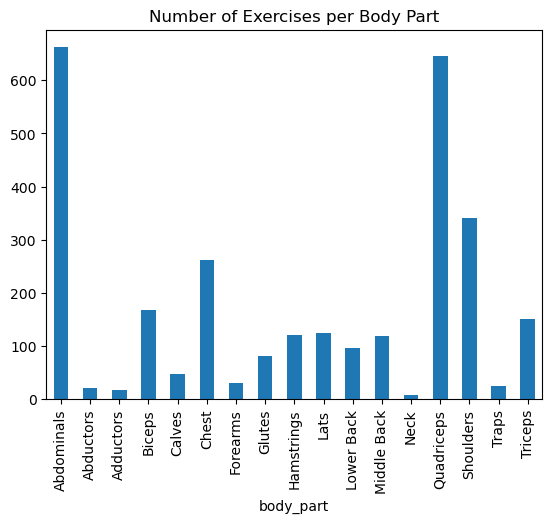

In [ ]:
# Exercises by body part
df_megagym.groupby('body_part')['exercise_name'].count().plot(kind='bar', title='Number of Exercises per Body Part')
plt.show()

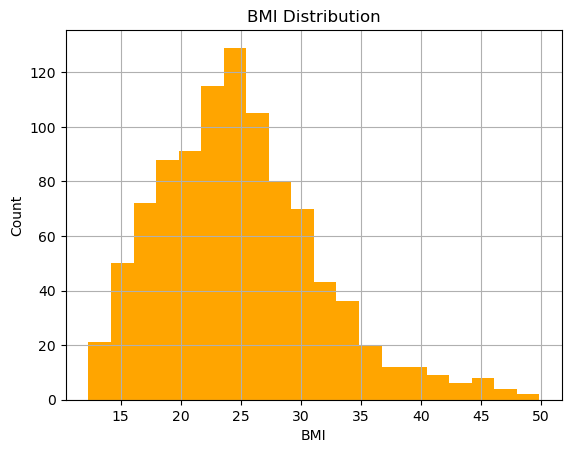

In [ ]:
df_gym_members['bmi'].hist(bins=20, color='orange')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

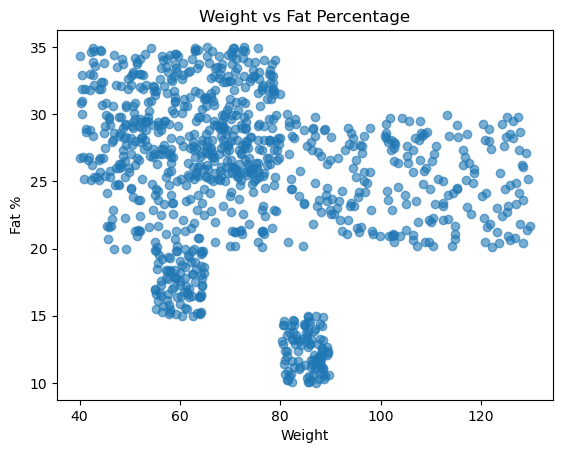

In [ ]:
# Weight vs Fat %
plt.scatter(df_gym_members['weight'], df_gym_members['fat_percentage'], alpha=0.6)
plt.xlabel("Weight")
plt.ylabel("Fat %")
plt.title("Weight vs Fat Percentage")
plt.show()


In [ ]:
df_detailed.to_csv('exercises_cleaned.csv', index=False)
print("File 'exercises_cleaned.csv' has been saved.")

df_gym_members.to_csv('gym_members_cleaned.csv', index=False)
print("File 'gym_members_cleaned.csv' has been saved.")

df_meals.to_csv('meals_cleaned.csv', index=False)
print("File 'meals_cleaned.csv' has been saved.")

df_summary.to_csv('program_summary_cleaned.csv', index=False)
print("File 'program_summary_cleaned.csv' has been saved.")

df_megagym.to_csv('megagym_cleaned.csv', index=False)
print("File 'megagym_cleaned.csv' has been saved.")


File 'exercises_cleaned.csv' has been saved.
File 'gym_members_cleaned.csv' has been saved.
File 'meals_cleaned.csv' has been saved.
File 'program_summary_cleaned.csv' has been saved.
File 'megagym_cleaned.csv' has been saved.
